In [237]:
%matplotlib inline
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [238]:
# use seaborn for tuning plots = change figure size
sns.set(rc={'figure.figsize':(9,6)})

# load data

In [239]:
train_df = pd.read_csv('C:/Data/kaggle/Titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
test_df = pd.read_csv('C:/Data/kaggle/Titanic/test.csv')
orig_test_id = test_df
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Explore data

In [241]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [242]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [243]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [244]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [245]:
train_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [246]:
train_df['Sex_new']= train_df.Sex.replace({'male':1, 'female':2})

In [247]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [248]:
train_df['Emb_new']= train_df.Embarked.replace({'S':1, 'C':2, 'Q':3, np.nan:0})

In [249]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new,Emb_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


# I decided to drop 'PassengerId' and 'Name',because these have count unique value = count value of column. And to drop Cabin, because it column has too many NaN values. And Ticket, because (my suppose) this feature not correlate to survived   

In [250]:
train_df = train_df.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'], axis=1)

In [251]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_new,Emb_new
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,2,2
2,1,3,26.0,0,0,7.9250,2,1
3,1,1,35.0,1,0,53.1000,2,1
4,0,3,35.0,0,0,8.0500,1,1


#  Find and Drop rows with NaN value

In [252]:
train_df = train_df.dropna(how='any',axis=0)
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_new,Emb_new
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,1.365546,1.257703
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.525083
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,1.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,2.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,2.000000,3.000000


# Do the same things with test-data

In [253]:
test_df['Sex_new']= test_df.Sex.replace({'male':1, 'female':2})
test_df['Emb_new']= test_df.Embarked.replace({'S':1, 'C':2, 'Q':3, np.nan:0})
test_df = test_df.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'], axis=1)
# test_df = test_df.dropna(how='any',axis=0)
test_df = test_df.fillna(test_df.Age.mean())

In [278]:
test_df = test_df.fillna(test_df.Age.mean())

In [254]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_new,Emb_new
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,1.363636,1.464115
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622,0.685516
min,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,1.000000,1.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,2.000000,2.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,2.000000,3.000000


In [280]:
test_df.isna().sum()

Pclass     0
Age        0
SibSp      0
Parch      0
Fare       0
Sex_new    0
Emb_new    0
dtype: int64

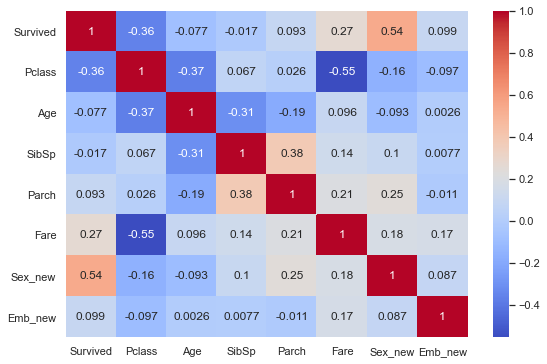

In [256]:
sns.heatmap(train_df.corr(),annot=True, cmap= 'coolwarm')

# fit model DecisionTree

In [257]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [258]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_new,Emb_new
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,2,2
2,1,3,26.0,0,0,7.9250,2,1
3,1,1,35.0,1,0,53.1000,2,1
4,0,3,35.0,0,0,8.0500,1,1


In [282]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df.Survived
X_test = test_df

In [283]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_new,Emb_new
0,3,34.50000,0,0,7.8292,1,3
1,3,47.00000,1,0,7.0000,2,1
2,2,62.00000,0,0,9.6875,1,3
3,3,27.00000,0,0,8.6625,1,1
4,3,22.00000,1,1,12.2875,2,1
...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,1
414,1,39.00000,0,0,108.9000,2,2
415,3,38.50000,0,0,7.2500,1,1
416,3,30.27259,0,0,8.0500,1,1


# Look for the best parametrs

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier

In [276]:
clf = tree.DecisionTreeClassifier()

In [263]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth':range(1,30)}

In [264]:
GridSearchCV_clf = GridSearchCV(clf, parametrs, cv=5)
GridSearchCV_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [265]:
GridSearchCV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

#  the best CLF

In [266]:
best_clf = GridSearchCV_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [267]:
GridSearchCV_clf.best_estimator_.score(X_train, y_train)

0.9131652661064426

In [268]:
y_pred_val = best_clf.predict(X_train) # predict on train data to evaluate Precision and Recall on a few next steps

In [269]:
precision_score(y_train, y_pred_val)

0.9710743801652892

In [270]:
recall_score(y_train, y_pred_val)

0.8103448275862069

# Predict

In [290]:
rez = best_clf.predict(X_test)

In [289]:
output = pd.DataFrame({'PassengerId':orig_test_id.PassengerId , 'Survived':rez})
output.to_csv('submission_titanic.csv', index = False)